# Predicting Video Game Sales

At a whopping USD 138 billion per year, the video game industry has by now vastly outpaced the music and movie industry combined. For instance, one of the best generating box office opening (Avengers: Infinity Wars) generated about USD 259 million. In comparison, Grand Theft Auto V reached USD 818 million in sales in the first 24 hours.

Even so, the gaming industry suffers from the same problems as the music and movie industries: it's a hit-driven business, meaning that the great majority of the video game industry's software releases have been commercial failures.

In this scenario, we will investigate whether or not we can predict if a game will be a hit ... or not.

# Submission

In order to submit on gradescope, you need to submit the following:
- the homework jupyter notebook it self ```hw6.ipynb```
- the pdf generated from the notebook, you can get the pdf from ```File->Print Preview```

In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Load the data

In [2]:
df = pd.read_csv("VideoGameSales.csv")
df.head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,Player0_Rating,...,Player10_Rating,Player11_Rating,Player12_Rating,Player13_Rating,Player14_Rating,Player15_Rating,Player16_Rating,Player17_Rating,Player18_Rating,Player19_Rating
0,EverGrace,PS2,2000.0,Role-Playing,0.35,59.0,12.0,7.8,T,133.158650,...,57.665713,-33.266424,61.475556,14.057871,-45.129118,72.393172,118.762244,126.136540,-118.843764,-29.980012
1,Spider-Man,PS,2000.0,Action,3.13,87.0,19.0,9.0,E,71.527897,...,29.303636,11.642698,41.533339,123.124881,15.502932,-37.045746,0.629941,-57.932255,-10.307351,156.520977
2,World Destruction League: Thunder Tanks,PS,2000.0,Action,0.17,35.0,4.0,1.2,T,-154.540029,...,-8.759464,41.054869,-31.947248,21.670272,-49.836887,-131.333637,48.603401,-30.542838,85.473778,-22.211732
3,The Sims,PC,2000.0,Simulation,0.05,92.0,38.0,7.9,T,-0.838385,...,-88.551848,6.941876,59.678162,-41.710075,137.404091,-56.414104,-30.806495,-79.254849,101.767612,91.455925
4,Street Fighter EX3,PS2,2000.0,Fighting,0.85,64.0,17.0,7.9,T,62.133597,...,-100.122820,18.085152,38.614088,-10.236145,140.736240,-52.202478,9.647581,131.149693,121.277913,-7.295846
5,Resident Evil: Survivor,PS,2000.0,Action,0.71,39.0,10.0,7.0,M,-72.008556,...,123.610567,224.575470,197.288644,-54.808814,-111.203859,-147.050099,-73.944764,20.690349,-70.248031,-300.318330
6,NBA Live 2001,PS,2000.0,Sports,1.25,86.0,10.0,8.0,E,26.551159,...,2.827449,163.682106,236.012179,54.286971,-1.813431,-26.076748,41.819530,28.190020,-65.512286,30.322477
7,The Typing of the Dead,DC,2000.0,Shooter,0.05,83.0,12.0,7.8,M,10.854853,...,-21.116660,-188.189685,-99.448735,-16.042977,-10.633311,26.270690,-43.118861,-201.748563,-63.200047,183.670689
8,Mega Man X5,PS,2000.0,Platform,0.75,76.0,10.0,8.9,E,0.429143,...,87.052102,142.512376,-11.580142,4.272996,-60.080042,16.880748,-116.731683,-79.417328,62.262734,16.334662
9,Knockout Kings 2001,PS,2000.0,Fighting,0.41,84.0,11.0,8.5,T,-17.460021,...,56.935061,-0.581965,72.991809,90.244004,71.575002,146.583903,-72.373481,72.683651,-7.215038,110.647014


Note that the name column is just an index column, so we will remove it as we would not use it for predictions.

In [3]:
df = df.drop(['Name'],axis =1)
df.head()

,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,Player0_Rating,Player1_Rating,...,Player10_Rating,Player11_Rating,Player12_Rating,Player13_Rating,Player14_Rating,Player15_Rating,Player16_Rating,Player17_Rating,Player18_Rating,Player19_Rating
0,PS2,2000.0,Role-Playing,0.35,59.0,12.0,7.8,T,133.158650,-95.003397,...,57.665713,-33.266424,61.475556,14.057871,-45.129118,72.393172,118.762244,126.136540,-118.843764,-29.980012
1,PS,2000.0,Action,3.13,87.0,19.0,9.0,E,71.527897,-111.431914,...,29.303636,11.642698,41.533339,123.124881,15.502932,-37.045746,0.629941,-57.932255,-10.307351,156.520977
2,PS,2000.0,Action,0.17,35.0,4.0,1.2,T,-154.540029,-74.446175,...,-8.759464,41.054869,-31.947248,21.670272,-49.836887,-131.333637,48.603401,-30.542838,85.473778,-22.211732
3,PC,2000.0,Simulation,0.05,92.0,38.0,7.9,T,-0.838385,-14.317814,...,-88.551848,6.941876,59.678162,-41.710075,137.404091,-56.414104,-30.806495,-79.254849,101.767612,91.455925
4,PS2,2000.0,Fighting,0.85,64.0,17.0,7.9,T,62.133597,-136.736470,...,-100.122820,18.085152,38.614088,-10.236145,140.736240,-52.202478,9.647581,131.149693,121.277913,-7.295846


# 2. Data Overview

The dataframe contains 7 variables which we will use to predict the Global Sales (continuous). We are therefore dealing with a multi-variate regression problem. Before using ML to solve the problem, we want to have an overview of the data, so plotting is a good tool.

### 2.1 Sales each year

We first would like to take a look at how global sales in general change every year, so we want to create a plot whose x-axis represents the year_of_release and y-axis represents the total_sale for each year.

To create such plot, you might want to follow these steps:
1. group the records by "Year_of_Release"
2. extract the "Global_Sales" sum series
3. apply plot() to the series

You should be able to do this in one line of code using pandas.

The following is how your plot should look like.

![avatar](./pictures/year-vs-sales.png)

<AxesSubplot:xlabel='Year_of_Release', ylabel='sales'>

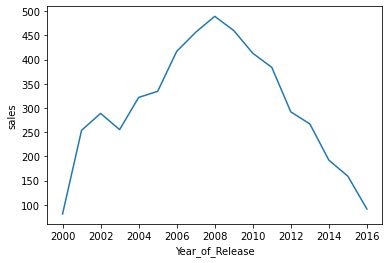

In [4]:
df.groupby(['Year_of_Release'])['Global_Sales'].sum().plot(ylabel='sales')

### 2.2 Sales each genre

Then we want to look at sales for each genre. We want to create a bar chart whose x-axis represents the sales for each genrn while the y-axis represents different genre.

To create such plot, you might want to follow these steps:
1. group the dataframe by "Genre"
2. extract the "Global_Sales" sum series
3. to get barplots, use .plot.barh() on this series

You should be able to do this in one line of code using pandas.

The following is how your plot should look like.

![avatar](./pictures/sales-per-genre.png)

<AxesSubplot:ylabel='Genre'>

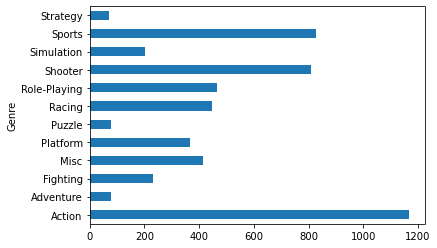

In [5]:
df.groupby(['Genre'])['Global_Sales'].sum().plot.barh()

# 3. Train-Test split

Before training the model, we would like to split the data set as the proper way of testing the validity of an algorithm is to have a test set and set it aside for future testing. We do not touch this test-set while training the model.

In [6]:
from sklearn.model_selection import train_test_split

y = df[["Global_Sales"]].values.ravel()

# Generate dummies for all catagrical features
X = pd.get_dummies(df.drop(["Global_Sales"], axis=1)).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=False)


print("Original:", X.shape)
print("Train:   ", X_train.shape,y_train.shape)
print("Test:    ", X_test.shape,y_test.shape)

Original: (6747, 59)
Train:    (5397, 59) (5397,)
Test:     (1350, 59) (1350,)


### Question: Note that we set the parameter shuffle=False when doing train-test split. Why is that?
In this task, we want to apply historical data to predict whether a game will be hit in the future, so the dataset should be split like time-series set.

# 4. Base Model

When we train some models, we always want a target to beat. Normally, we will use the constant model whose prediction of any given data is the mean of the train data, because our model should at least be better than this naive prediction, otherwise the model would be meaningless.  

So we would like to know the MSE for the simple constant model, write down the code here.

In [7]:
from sklearn.metrics import mean_squared_error

constant_mse = mean_squared_error(y_test, np.array([y_train.mean()]*y_test.shape[0]))
print("Constant MSE: %.2f" % constant_mse)

Constant MSE: 2.23


# 5. K Nearest Neighbours

The first model we will look at is KNN Regression. sklearn has an implementation in ```sklearn.neighors```.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

Let's train some knn models with different ks and see their performace on test set. Complete the following:
- Train knn models for k from 2 to 50.
- Draw a curve representing the relationship between k and test mse.
- Draw the test mse for the constant model on the same graph(this should be a horizontal line).

In [9]:
test_mse_list = []
k_range = range(2, 51)
# train multiple knn models and record test mse
for k in k_range:
    KNN = KNeighborsRegressor(k)
    KNN.fit(X_train, y_train)
    X_pred = KNN.predict(X_test)
    test_mse_list.append(mean_squared_error(y_test, X_pred))

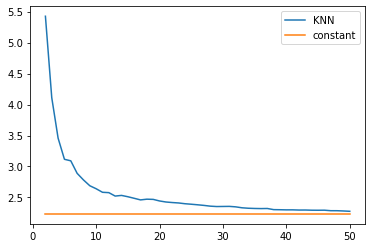

In [10]:
# make the plots
plt.plot(k_range, test_mse_list, label="KNN")
plt.plot(k_range, [constant_mse]*len(k_range), label="constant")
plt.legend()
plt.show()

### Question: Compare the test mse for knn models with constant model, what do you find? How would you explain it?
With K increasing, the knn becomes less flexible, so the test mse will approach to constant.

# 6. Regularized Regression Model

Then we will look at regularized model. We've seen L1/L2 regularized linear models in lecture. Sklearn has an efficient SGD(Stochastic Gradient Descent) implementation called SGDRegressor where allow us to solve regularized linear regression.  

Compared to direct solver, SGDRegressor has the following advantages:
- Efficiency
- Ease of implementation (lots of opportunities for code tuning).  

SGDRegressor has the following disadvantages:
- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.
  
  
The following is an example of using it and it shows some parameters that you can tune with:

In [11]:
from sklearn.linear_model import SGDRegressor


#limit the max_iter and set the random seed to fix the out put.
sgd_model = SGDRegressor(
    penalty="l1",            # the type of regularization component to use, 
                             # l1 indicates Lasso and l2 indicats Ridge
    max_iter=1000,           # maximal number of epochs
    tol=1e-3,                # tolerance for the stopping condition (stops if it 
                             # can't improve the result more than tol), this speeds 
                             # up model building and is great for prototyping
    alpha = 0.01,            # regularization strength, low = free model, high = controlled model
    random_state=0           # random seed, fix the output, keep it 0 all the time in this hw
)

We are getting to a point where applying all the required steps for fitting a model is becoming cumbersome. Sklearn has a great feature called pipelines which allows you to apply all the necessary steps at once. For instance, consider a similar set-up to what we ended up with last time. We want to apply the following three steps:

1. Scale the data using a StandardScaler
2. Add polynomial features using PolynomialFeatures (in this section let's make degree=1)
3. Train a linear model using SGDRegressor (in this section let's make penalty=l1 and alpha=0.01)

![avatar](./pictures/pipeline.png)

The following code implements this pipeline for our current dataset. Complete the pipeline and report the test mse.  

Note: for all the sections below, whenever you train a SGDRegressor, please set the random seed to 0 to fix the output.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Design the pipeline as a sequence of steps each step
# is specified as a tuple ('name',model). We will refer
# to this name later.
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=1)),
    ("model", sgd_model 
    )
])
# Train using the whole pipeline using just 1 call!
pipeline.fit(X_train, y_train)
X_pred = pipeline.predict(X_test)

# Report the MSE on test data
l1_mse = mean_squared_error(y_test, X_pred)
print(f"the mse of L1 regulized regression is {l1_mse:.2f}")

the mse of L1 regulized regression is 1.99


# 7. Customized Cross Vlidation

Whenever we would like to train models and select the best parameters for them, we need to set-up a validation set. This validation set will be used for tuning parameters exclusively. This is a step that is often done wrong by novices in ML: you should never validate your parameters on the test-set. Doing so would cherry-pick the best solution and suffer from overfitting/variance problems.

![avatar](./pictures/cross_validation.svg)

This is how we've seen it until now. In many cases, however, we will want to test it repeatedly on different parts of the data to get a more reliable out-of-sample estimate.

![avatar](./pictures/grid_search_cross_validation.png)

The final validation error is, therefore, a summary (mean) of 5 individual tests. In every test, we take a piece of the data out for the sake of validation (blue piece) and train on the remainder (green). This is how you should validate datasets without a time-component.

However, using this original way of kfold cv is also shuffling the data in some way and does not meet our requirement that we don't want to shuffle the data. In this case, we would want to split the data in the follwoing way instead:

![avatar](./pictures/timeseriesval.png)

The default ```KFold()``` class in sklearn.model_selection does not handle this case, so we want to implement it ourselves.

In [13]:
# Note that for k=5 we only do validation for 4(k-1) times
# Input: data, an array inlucding all the train data you want to use for cv
# Output: splits, a list of tuples in the form of (train_index, val_index), just as the kfold() in sklearn
def customized_kfold(data, k):
    n = data.shape[0] # we first get the number of data points we have for future sue
    val_size = n//k
    splits = []
    for step in range(1, k):
        splits.append((np.array(range(val_size*step)), np.array(range(val_size*step+1, val_size*(step+1)))))
    return splits

In [14]:
# The function for full cross validation
# Input: X_train: full training X
#        y_train: full training y
#        k:       num of folds you want
#        model:   the sklearn model that you would like to do cv on
# Output: a tuple, (mean_train_mse, mean_val_mse)
def kfold_cross_validation(X_train, y_train, k, model):
    train_mse_list, val_mse_list = [], []
    for train_index, val_index in customized_kfold(X_train, k):
        X_train_sub, y_train_sub = X_train[train_index], y_train[train_index]
        X_val_sub, y_val_sub = X_train[val_index], y_train[val_index]
        model.fit(X_train_sub, y_train_sub)
        train_mse_list.append(mean_squared_error(y_train_sub, model.predict(X_train_sub)))
        val_mse_list.append(mean_squared_error(y_val_sub, model.predict(X_val_sub)))
    mean_train_mse = np.mean(train_mse_list)
    mean_val_mse = np.mean(val_mse_list)
    return (mean_train_mse, mean_val_mse)

Then do 10-fold cross validation with the functions you just write to find the best parameters for the following models and report the test mse for the best parameters you found for each model.
- SGDRegressor with penalty=l1
- SGDRegressor with penalty=l2
- KNNRegressor  

For SGDRegressor you only need to train alpha in ```[0, 0.001, 0.01, 0.1, 1, 5, 10]``` and degree in ```[1, 2]```, and for KNNRegressor you only need to train for k in ```range(10, 200, 10)```. Feel free to try larger search space but you might be careful with the run time.

## 7.1 SGDRegressor with penalty=l1(Lasso)

In [15]:
model_list_l1 = []
for i in [1,2]:
    for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]:
        model_list_l1.append({
        "pipeline": Pipeline([
            ("ss", StandardScaler()),
            ("poly", PolynomialFeatures(i)),
            ("sgd", SGDRegressor(penalty="l1",alpha=j,random_state=0))
        ]),
        "degree": i,
        "alpha": j
    })
# model_list_l1 = [
#        Pipeline([
#             ("ss", StandardScaler()),
#             ("poly", PolynomialFeatures(i)),
#             ("sgd", SGDRegressor(penalty="l1",alpha=j,random_state=0))
#         ])
#      for i in range(1, 3), for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]
# ]
mean_val_mse_list_l1 = []
for model_l1 in model_list_l1:
    mean_val_mse_list_l1.append(kfold_cross_validation(X_train, y_train, 10, model_l1["pipeline"])[1])
min_index_l1 = np.argmin(mean_val_mse_list_l1)
best_params_l1 = model_list_l1[min_index_l1]
best_score_l1 = mean_val_mse_list_l1[min_index_l1]
print(best_params_l1)
print(best_score_l1)

{'pipeline': Pipeline(steps=[('ss', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('sgd', SGDRegressor(alpha=0.1, penalty='l1', random_state=0))]), 'degree': 1, 'alpha': 0.1}
4.36719590246693


In [16]:
best_lasso = pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(best_params_l1["degree"])),
    ('sgd',  SGDRegressor(penalty="l1",alpha=best_params_l1["alpha"],random_state=0)),
])
best_lasso.fit(X_train, y_train)
mean_squared_error(best_lasso.predict(X_test), y_test)

1.8967724901205942

## 7.2 SGDRegressor with penalty=l2(Ridge)

In [17]:
model_list_l2 = []
for i in [1,2]:
    for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]:
        model_list_l2.append({
        "pipeline": Pipeline([
            ("ss", StandardScaler()),
            ("poly", PolynomialFeatures(i)),
            ("sgd", SGDRegressor(penalty="l2",alpha=j,random_state=0))
        ]),
        "degree": i,
        "alpha": j
    })
# model_list_l2 = [
#        Pipeline([
#             ("ss", StandardScaler()),
#             ("poly", PolynomialFeatures(i)),
#             ("sgd", SGDRegressor(penalty="l2",alpha=j,random_state=0))
#         ])
#      for i in range(1, 3) for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]
# ]
mean_val_mse_list_l2 = []
for model_l2 in model_list_l2:
    mean_val_mse_list_l2.append(kfold_cross_validation(X_train, y_train, 10, model_l2["pipeline"])[1])
min_index_l2 = np.argmin(mean_val_mse_list_l2)
best_params_l2 =model_list_l2[min_index_l2]
best_score_l2 = mean_val_mse_list_l2[min_index_l2]
print(min_index_l2)
print(best_params_l2)
print(best_score_l2)


4
{'pipeline': Pipeline(steps=[('ss', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('sgd', SGDRegressor(alpha=1, random_state=0))]), 'degree': 1, 'alpha': 1}
4.166859375091365


In [18]:
best_ridge = pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(best_params_l2["degree"])),
    ('sgd',  SGDRegressor(penalty="l2",alpha=best_params_l2["alpha"],random_state=0)),
])
best_ridge.fit(X_train, y_train)
mean_squared_error(best_ridge.predict(X_test), y_test)

1.961139914435924

## 7.3 KNN

In [19]:

model_list_knn=[]
for i in range(10,200,10):
    model_list_knn.append({"model":KNeighborsRegressor(i),"k": i})
mean_val_mse_list_knn = []
for model_knn in model_list_knn:
    mean_val_mse_list_knn.append(kfold_cross_validation(X_train, y_train, 10, model_knn["model"])[1])
min_index_knn = np.argmin(mean_val_mse_list_knn)
best_params_knn =model_list_knn[min_index_knn]
best_score_knn = mean_val_mse_list_knn[min_index_knn]
print(best_params_knn)
print(best_score_knn)

{'model': KNeighborsRegressor(n_neighbors=170), 'k': 170}
4.487553829315719


In [20]:
best_knn = KNeighborsRegressor(best_params_knn["k"])
best_knn.fit(X_train, y_train)
mean_squared_error(best_knn.predict(X_test), y_test)

2.2441378035191595

# 8. KNN Revisited

## 8.1 Feature Selection

We should have noticed that the performance for knn models are not that good. We would like to do something to improve its performance. We learned in class that l1 regularized regression can perform feature selection. Let's try it on our dataset.  

Complete the following:
- Run SGDRegressor again with l1 penalty and the best parameters you select from cv.
- Find those features selected by the l1 regularized model and modify the dataset.
- Run knn models for k in ```range(50, 2000, 100)```.
- Make a plot of 1/k versus test mse.
- Plot the test mse of the constant baseline model on the same graph.

In [21]:
# Since numpy array does not have a count method, we might want to implement a 
# hepler function to find the index with zero and nonzero numbers.
# Your implement does not need to take only one input, or you even don't need to implement 
# this to finish the hw, this function is only used to make it easier for you to solve the
# remaining problems.
def find_zero_and_nonezero_index(lst):
    zero_index_list = []
    nonzero_index_list = []
    for index, value in enumerate(lst):
        if value == 0:
            zero_index_list.append(index)
        else:
            nonzero_index_list.append(index)
#         lambda (index,value): zero_index_list.append(index) if value==0
    
    return (np.array(nonzero_index_list), np.array(zero_index_list))

In [22]:
# plug in the best params you just find.
pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(best_params_l1["degree"])),
    ('sgd',  SGDRegressor(penalty="l1", alpha=best_params_l1["alpha"],random_state=0)),
])

# Train using the whole pipeline using just 1 call!
pipeline.fit(X_train,y_train)

# Find the coeficients for the SGDRegressor
# Hint: You can retreive the model for each step in the pipeline use pipeline.steps
_,model_coef = pipeline.steps[2]
coef = model_coef.coef_
print(coef)

[ 0.          0.          0.14821721  0.49847481  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.06095104  0.          0.          0.          0.          0.
  0.          0.14138839  0.          0.         -0.03440476  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.11592697  0.          0.          0.          0.        ]


In [23]:
# Find the zero and nonzero index.
# This step is optional, if you think you don't need it, you can skip it.
# Hint: Does the number of features you retrieve from the pipeline matches the number of 
#       features in the original dataframe?
nonzero_index, zero_index = find_zero_and_nonezero_index(coef[1:])

In [24]:
test_mse_list = []
train_mse_list = []
X_train_selected = X_train[:, nonzero_index]
X_test_selected = X_test[:, nonzero_index]
k_range = range(50, 2000, 100)
for k in k_range:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_selected, y_train)
    train_mse_list.append(mean_squared_error(y_train, knn.predict(X_train_selected)))
    test_mse_list.append(mean_squared_error(y_test, knn.predict(X_test_selected)))

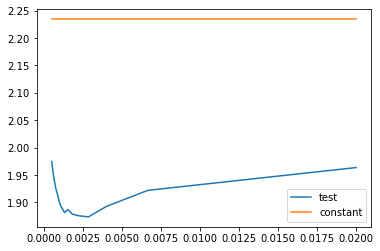

In [25]:
k_list = [1/k for k in k_range]
plt.plot(k_list, test_mse_list, label="test")
plt.plot(k_list, [constant_mse]*len(k_list), label="constant")
plt.legend()
plt.show()

### Question: Compare this plot with what you have in section5, is there any difference between them? If so what caused such differences?
Yes, the test mse in section 5 will finally appoarch to constant mse, but test mse in this plot is always smaller than constant mse for all K，and when K become big enough, the mse will increase.

Through lasso, some features not related to sales are deleted which will cause noise during train the knn model. After removing those noise, the mse decreased.

Now we would like to compare how train and test mse changes. Complete the following:
- Make two subplots in the same row, the left one should be 1/k versus train mse, and the right one should be 1/k versus test mse.

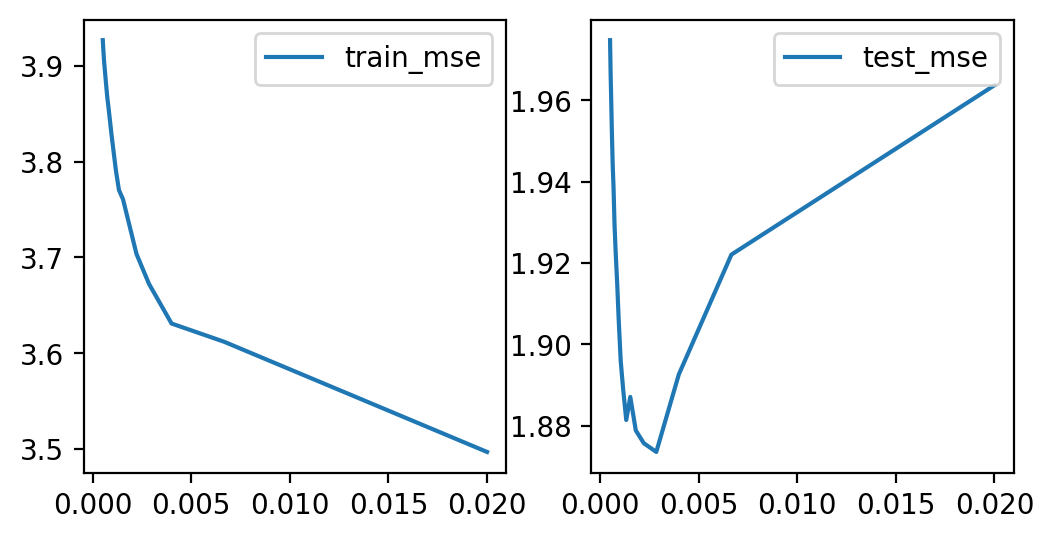

In [26]:
fig = plt.figure(1, figsize=[6, 3], dpi=200)
k_list = [1/k for k in k_range]
subplot = plt.subplot(1, 2, 1)
subplot.plot(k_list, train_mse_list, label="train_mse")
plt.legend()
subplot = plt.subplot(1, 2, 2)
subplot.plot(k_list, test_mse_list, label="test_mse")
plt.legend()
plt.show()

### Question: How do the trends differ for train mse from test mse? Explain the reason.
As 1/K incease, the model is more flexible and approach to overfitting, so the train mse always decrease, but test mse will decrease and then increase.

## 8.2 More on features deleted

In last section we train knn models on those features selected by Lasso, now we will take a look at what will happen if we train on those features that are deleted. Complete the following:  
- Find the features deleted by lasso
- Run knn models for k in ```range(50, 2000, 100)```
- Make two subplots in the same row, the left one should be 1/k versus train mse, and the right one should be 1/k versus test mse.

In [27]:
test_mse_list = []
train_mse_list = []
k_range = range(50, 2000, 100)
train_deleted = X_train[:, zero_index]
test_deleted = X_test[:, zero_index]
for k in k_range:
    knn = KNeighborsRegressor(k)
    knn.fit(train_deleted, y_train)
    train_mse_list.append(mean_squared_error(y_train, knn.predict(train_deleted)))
    test_mse_list.append(mean_squared_error(y_test, knn.predict(test_deleted)))

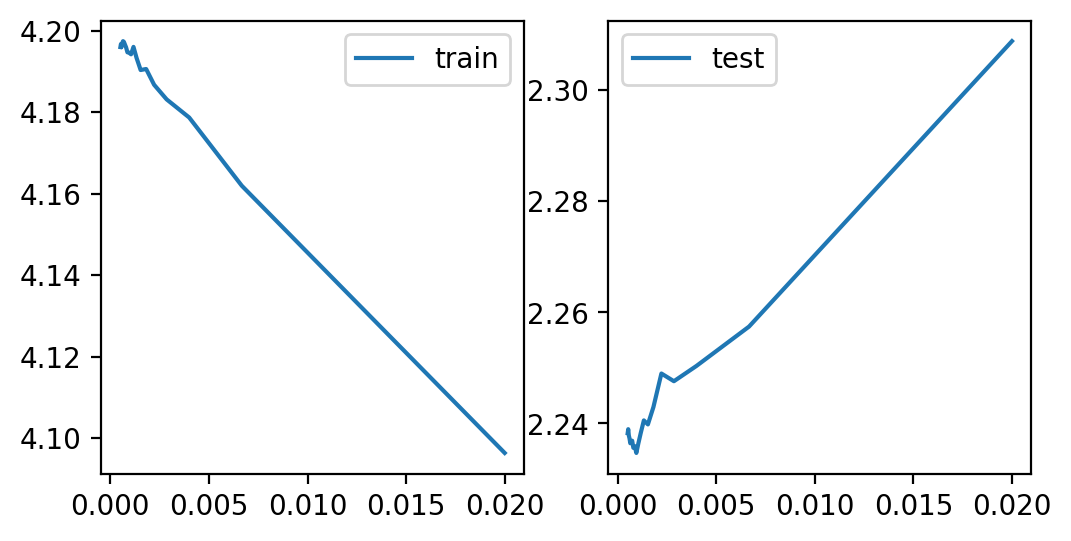

In [28]:
fig = plt.figure(1, figsize=[6, 3], dpi=200)
k_list = [1/k for k in k_range]
subplot = plt.subplot(1, 2, 1)
subplot.plot(k_list, train_mse_list, label="train")
plt.legend()
subplot = plt.subplot(1, 2, 2)
subplot.plot(k_list, test_mse_list, label="test")
plt.legend()
plt.show()

### Question: Are the trends for train mse and test mse the same with what you have in section 8.1? If not what are the differences? Explain.

The trend for train mse is the same with section 8.1, but the trend for test mse is different and always increase. Because we predict test set based on deleted features which have little contribution for prediction, the trend for mse will always increase, as the model become more flexible.


# 9. Cross Validation with Modified Dataset

Now you have modified the dataset according to lasso. Please retrain the following model on the modified dataset you have and find the best parameters for them.
- SGDRegressor with penalty=l1
- SGDRegressor with penalty=l2
- KNNRegressor  

For SGDRegressor you only need to train alpha in ```[0, 0.001, 0.01, 0.1, 1, 5, 10]``` and degree in ```[1, 2]```, and for KNNRegressor you only need to train for k in ```range(10, 200, 10)```. Feel free to try larger search space but you might be careful with the run time.

## 9.1 SGDRegressor with penalty=l1(Lasso)

In [29]:
model_list_l1 = []
for i in [1,2]:
    for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]:
        model_list_l1.append({
        "pipeline": Pipeline([
            ("ss", StandardScaler()),
            ("poly", PolynomialFeatures(i)),
            ("sgd", SGDRegressor(penalty="l1",alpha=j,random_state=0))
        ]),
        "degree": i,
        "alpha": j
    })
# model_list_l1 = [
#        Pipeline([
#             ("ss", StandardScaler()),
#             ("poly", PolynomialFeatures(i)),
#             ("sgd", SGDRegressor(penalty="l1",alpha=j,random_state=0))
#         ])
#      for i in range(1, 3), for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]
# ]
mean_val_mse_list_l1 = []
for model_l1 in model_list_l1:
    mean_val_mse_list_l1.append(kfold_cross_validation(X_train_selected, y_train, 10, model_l1["pipeline"])[1])
min_index_l1 = np.argmin(mean_val_mse_list_l1)
best_params_l1 = model_list_l1[min_index_l1]
best_score_l1 = mean_val_mse_list_l1[min_index_l1]
print(best_params_l1)
print(best_score_l1)

{'pipeline': Pipeline(steps=[('ss', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('sgd', SGDRegressor(alpha=0.1, penalty='l1', random_state=0))]), 'degree': 1, 'alpha': 0.1}
4.395816383611389


In [30]:
best_lasso = pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(best_params_l1["degree"])),
    ('sgd',  SGDRegressor(penalty="l1",alpha=best_params_l1["alpha"],random_state=0)),
])
best_lasso.fit(X_train_selected, y_train)
mean_squared_error(best_lasso.predict(X_test_selected), y_test)

1.8967825937852356

## 9.2 SGDRegressor with penalty=l2(Ridge)

In [31]:
model_list_l2 = []
for i in [1,2]:
    for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]:
        model_list_l2.append({
        "pipeline": Pipeline([
            ("ss", StandardScaler()),
            ("poly", PolynomialFeatures(i)),
            ("sgd", SGDRegressor(penalty="l2",alpha=j,random_state=0))
        ]),
        "degree": i,
        "alpha": j
    })
# model_list_l2 = [
#        Pipeline([
#             ("ss", StandardScaler()),
#             ("poly", PolynomialFeatures(i)),
#             ("sgd", SGDRegressor(penalty="l2",alpha=j,random_state=0))
#         ])
#      for i in range(1, 3) for j in [0, 0.001, 0.01, 0.1, 1, 5, 10]
# ]
mean_val_mse_list_l2 = []
for model_l2 in model_list_l2:
    mean_val_mse_list_l2.append(kfold_cross_validation(X_train_selected, y_train, 10, model_l2["pipeline"])[1])
min_index_l2 = np.argmin(mean_val_mse_list_l2)
best_params_l2 =model_list_l2[min_index_l2]
best_score_l2 = mean_val_mse_list_l2[min_index_l2]
print(min_index_l2)
print(best_params_l2)
print(best_score_l2)

4
{'pipeline': Pipeline(steps=[('ss', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('sgd', SGDRegressor(alpha=1, random_state=0))]), 'degree': 1, 'alpha': 1}
4.160077927481826


In [32]:
best_ridge = pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(best_params_l2["degree"])),
    ('sgd',  SGDRegressor(penalty="l2",alpha=best_params_l2["alpha"],random_state=0)),
])
best_ridge.fit(X_train_selected, y_train)
mean_squared_error(best_ridge.predict(X_test_selected), y_test)

1.8888277404940625

## 9.3 KNN

In [33]:
model_list_knn=[]
for i in range(10,200,10):
    model_list_knn.append({"model":KNeighborsRegressor(i),"k": i})
mean_val_mse_list_knn = []
for model_knn in model_list_knn:
    mean_val_mse_list_knn.append(kfold_cross_validation(X_train_selected, y_train, 10, model_knn["model"])[1])
min_index_knn = np.argmin(mean_val_mse_list_knn)
best_params_knn =model_list_knn[min_index_knn]
best_score_knn = mean_val_mse_list_knn[min_index_knn]
print(best_params_knn)
print(best_score_knn)

{'model': KNeighborsRegressor(n_neighbors=80), 'k': 80}
3.9562424863047294


In [34]:
best_knn = KNeighborsRegressor(best_params_knn["k"])
best_knn.fit(X_train_selected, y_train)
mean_squared_error(best_knn.predict(X_test_selected), y_test)

1.9368435805787036

### Question: Compare the test mse with what you have in section 7, is there any improvements? How much does each model improve? How would you explain the difference in the improvements?
There are imporvements in Ridge regression and KNN, but Lasso remains the same. Ridge improves from 1.961139914435924 to 1.8888277404940625, KNN improves from 2.2441378035191595 to 1.9368435805787036 and Lasso from 1.8967724901205942 to  1.8967825937852356.

Feature deletion filters some irrelevant features and improves the performance of Ridge and KNN. However, Lasso can automatically shrink irrelevant features to zero, so Lasso's performance remains the same.

### Question: What is your final choice for the model type and its parameter(s)? Explain your reason.
I will choose Lasso with whole features, since it can achieve a good performance and  automatically remove irrelevant features without external feature deletion.